In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('cleaned_agro_2022.csv')
df.head(10)

,Sail Date.,QTY.(KGS)
0,2022-01-01,19900
1,2022-01-01,77696
2,2022-01-01,15697
3,2022-01-01,13866
4,2022-01-01,22928
5,2022-01-01,25000
6,2022-01-01,26000
7,2022-01-01,72000
8,2022-01-01,49820
9,2022-01-01,24000


In [17]:
df.info()
df.sort_values(by='Sail Date.', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9157 entries, 0 to 9156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sail Date.  9157 non-null   object
 1   QTY.(KGS)   9157 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 143.2+ KB


In [18]:
df['Sail Date.'] = pd.to_datetime(df['Sail Date.'])

df_2022 = df[df['Sail Date.'].dt.year == 2022]

df_2022.to_csv('agro_exports_2022.csv', index=False)

In [19]:
df=pd.read_csv('agro_exports_2022.csv')

In [20]:
df = df.groupby('Sail Date.')['QTY.(KGS)'].sum().reset_index()

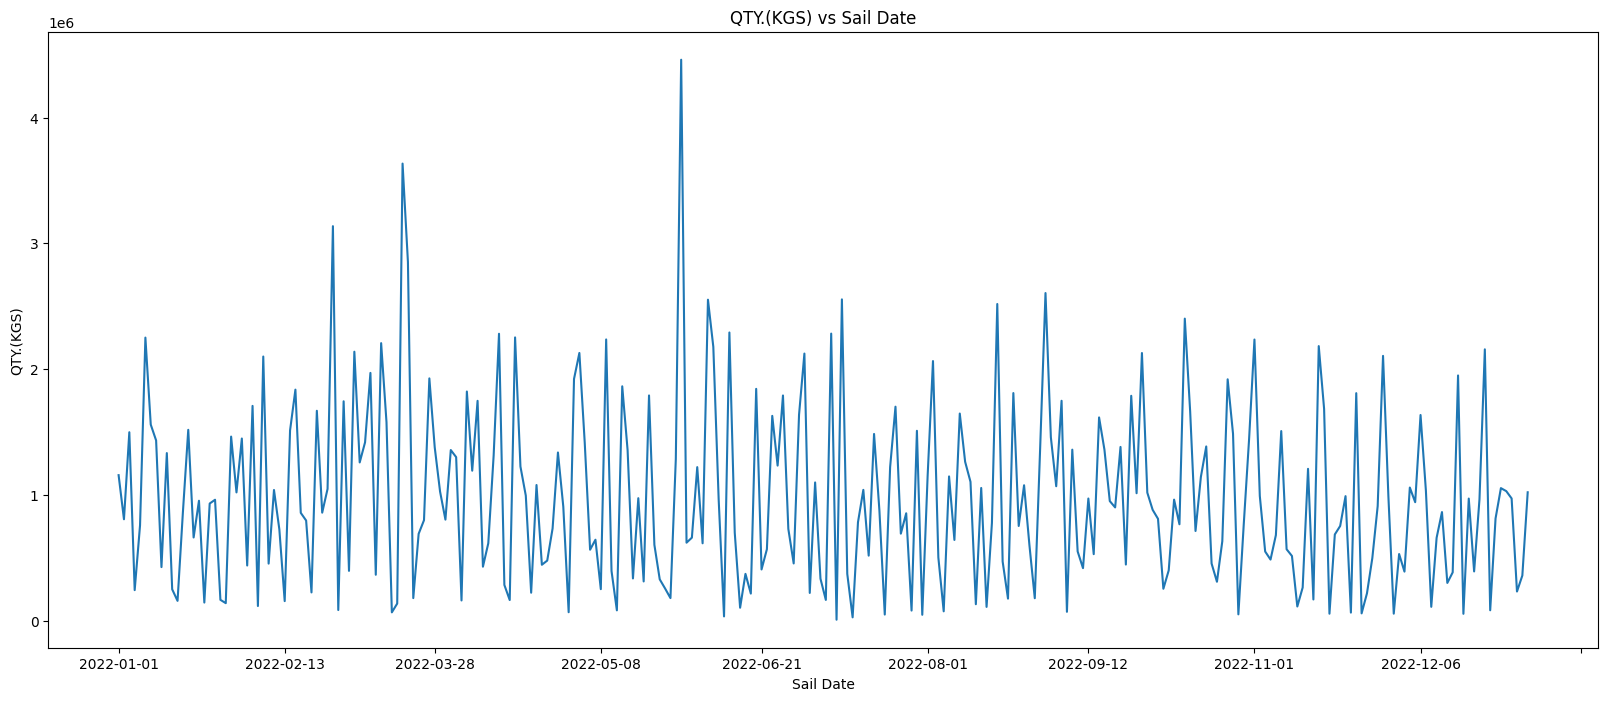

In [21]:
from matplotlib.dates import MonthLocator

plt.figure(figsize=(20, 8))
plt.plot(df['Sail Date.'], df['QTY.(KGS)'])
plt.xlabel('Sail Date')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date')

plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))

plt.show()

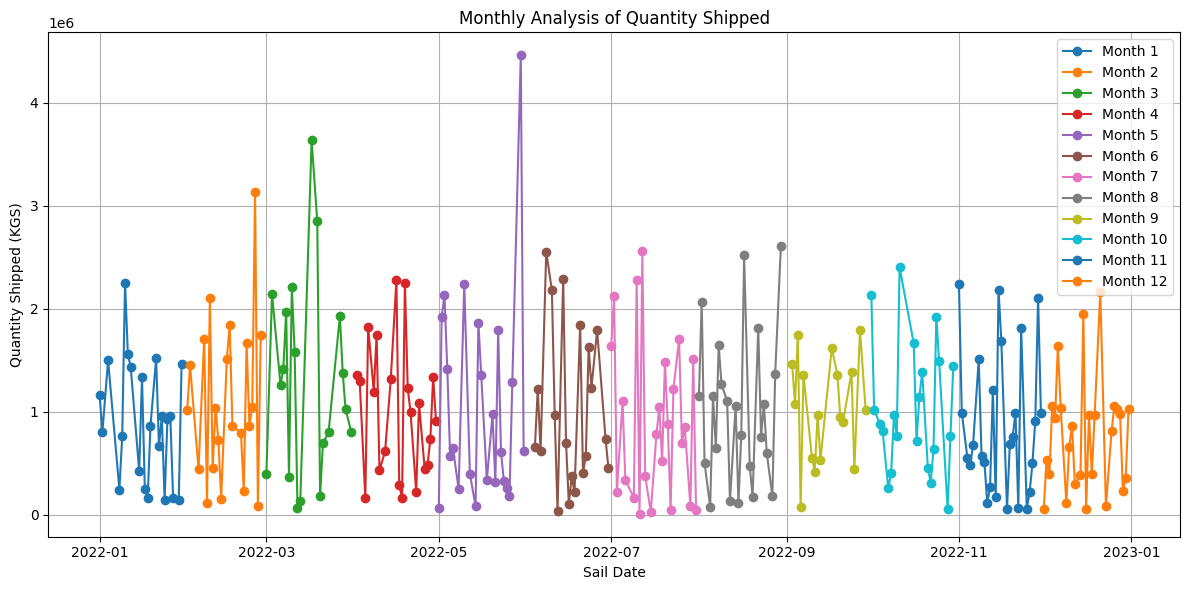

In [22]:
df['Sail Date.'] = pd.to_datetime(df['Sail Date.'], errors='coerce')

if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
    df['Year'] = df['Sail Date.'].dt.year
    df['Month'] = df['Sail Date.'].dt.month

    plt.figure(figsize=(12, 6))

    for month in range(1, 13):
        month_data = df[df['Month'] == month]
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')

    plt.xlabel('Sail Date')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


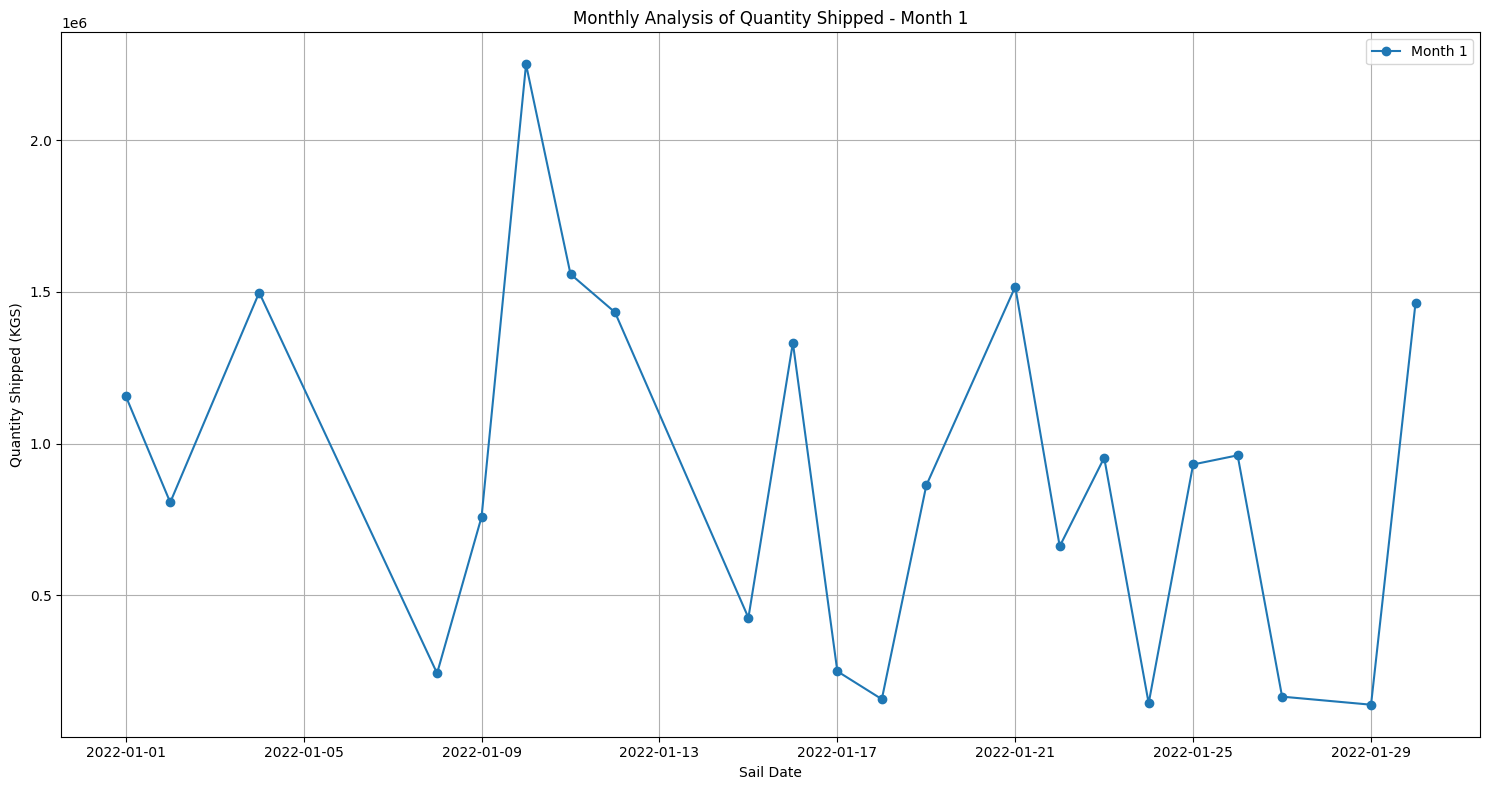

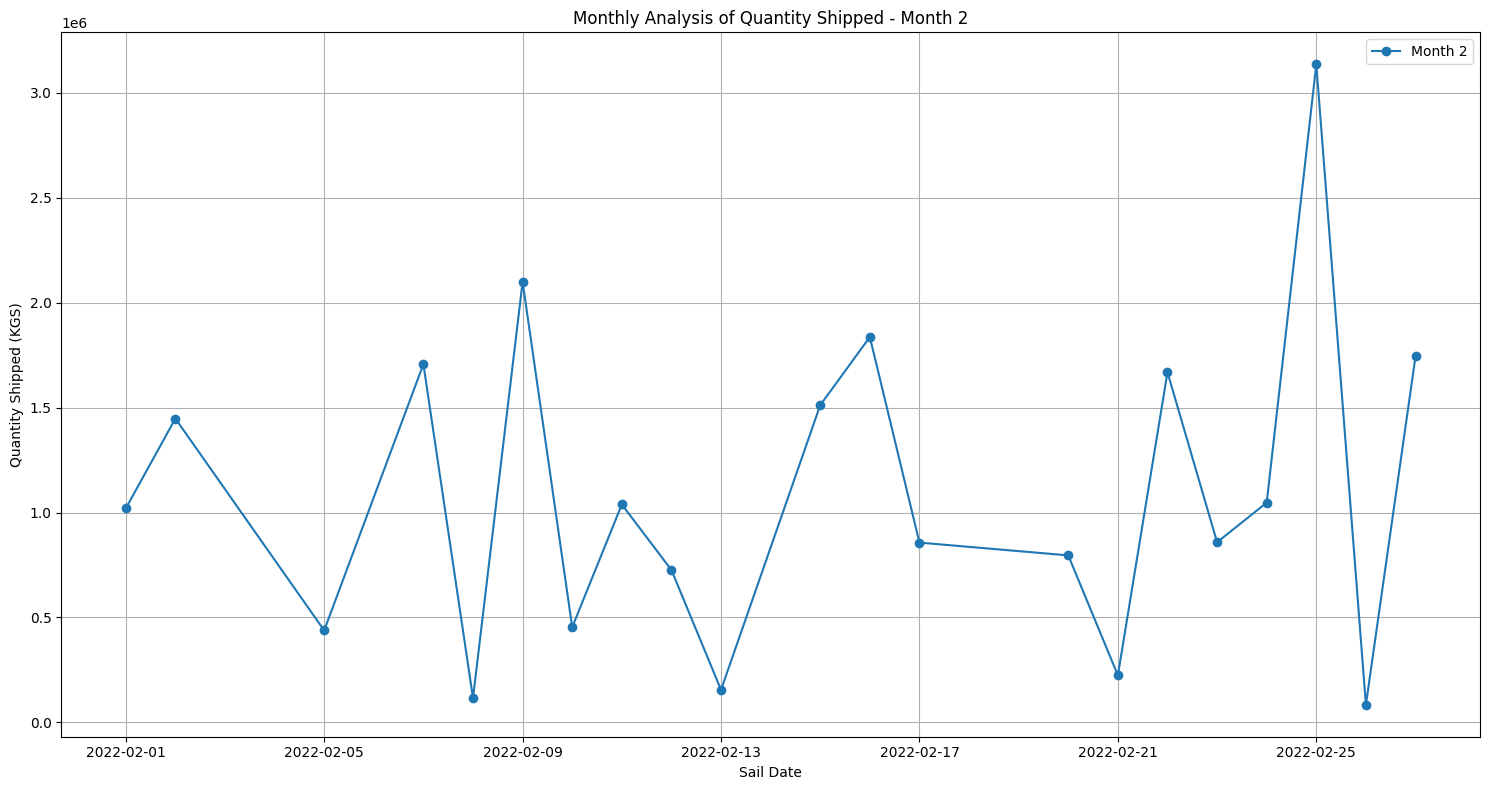

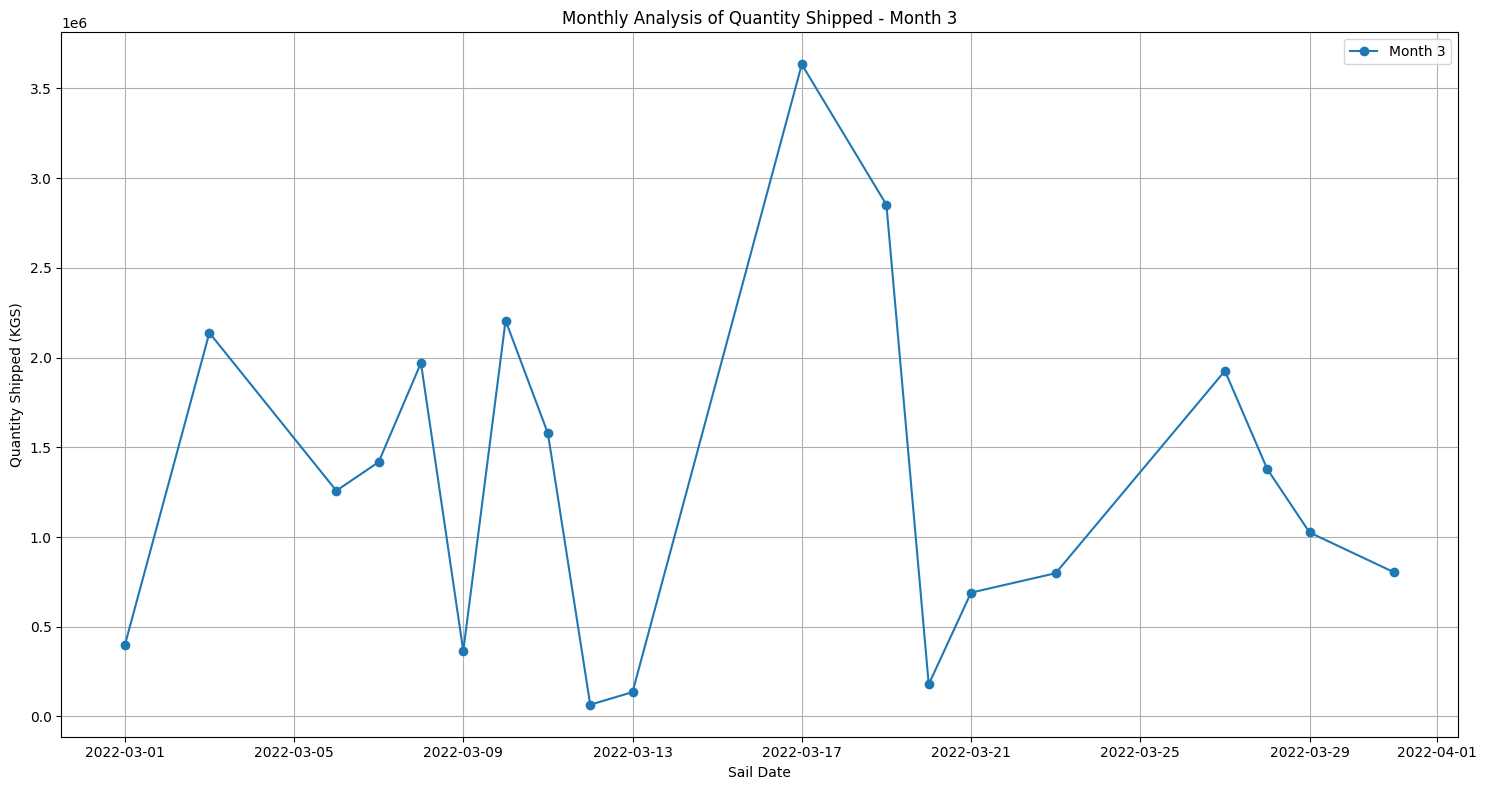

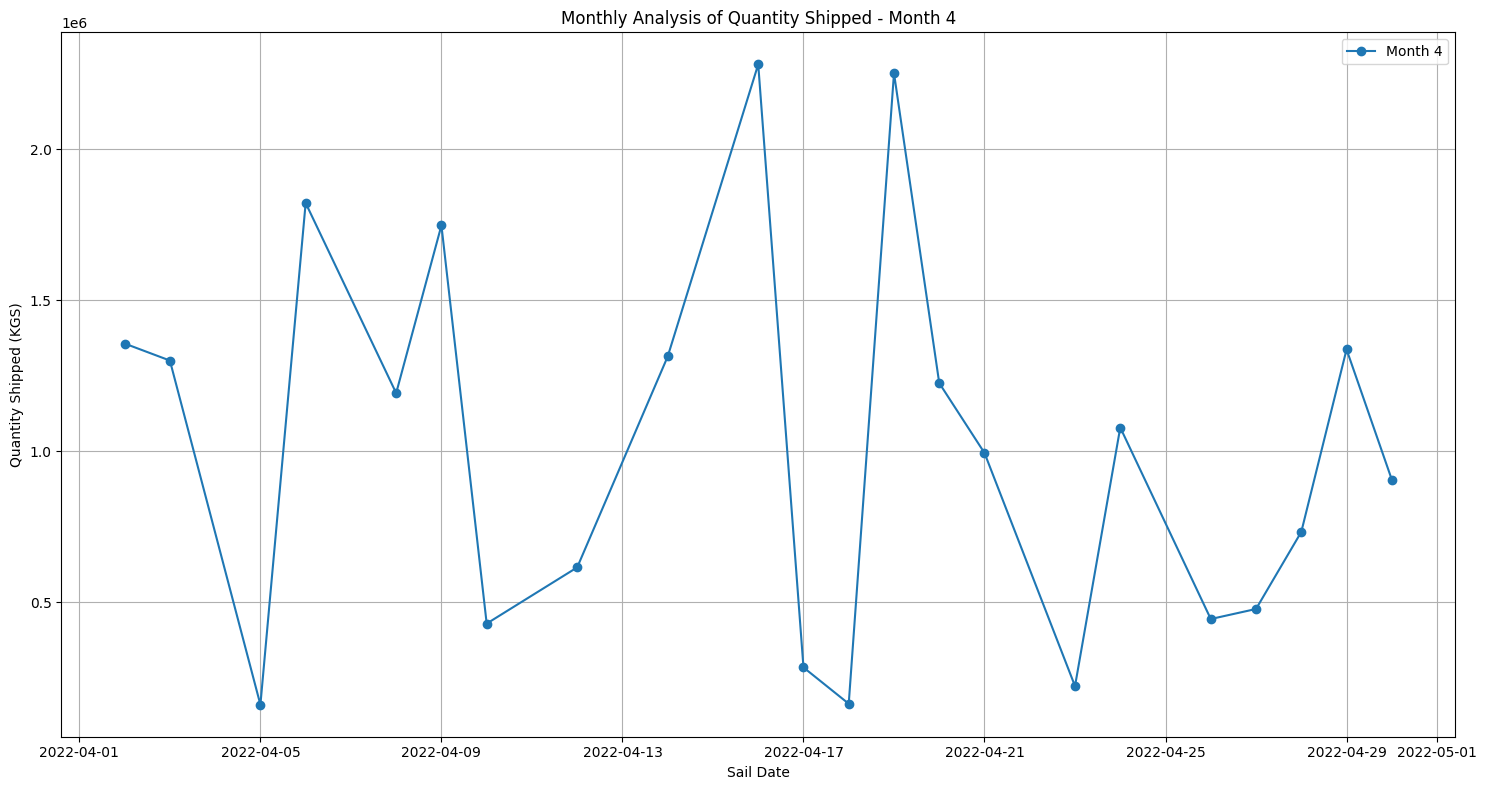

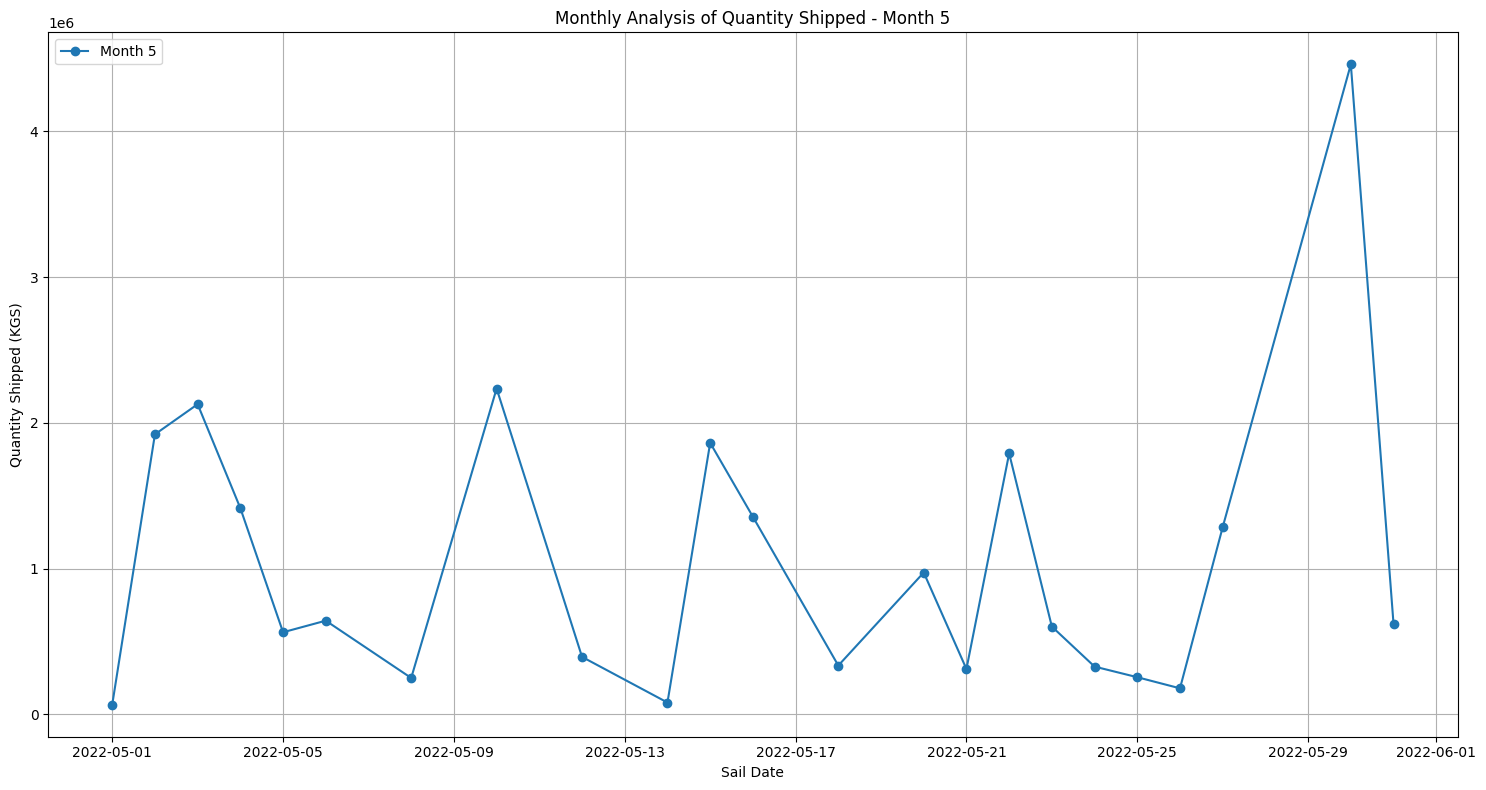

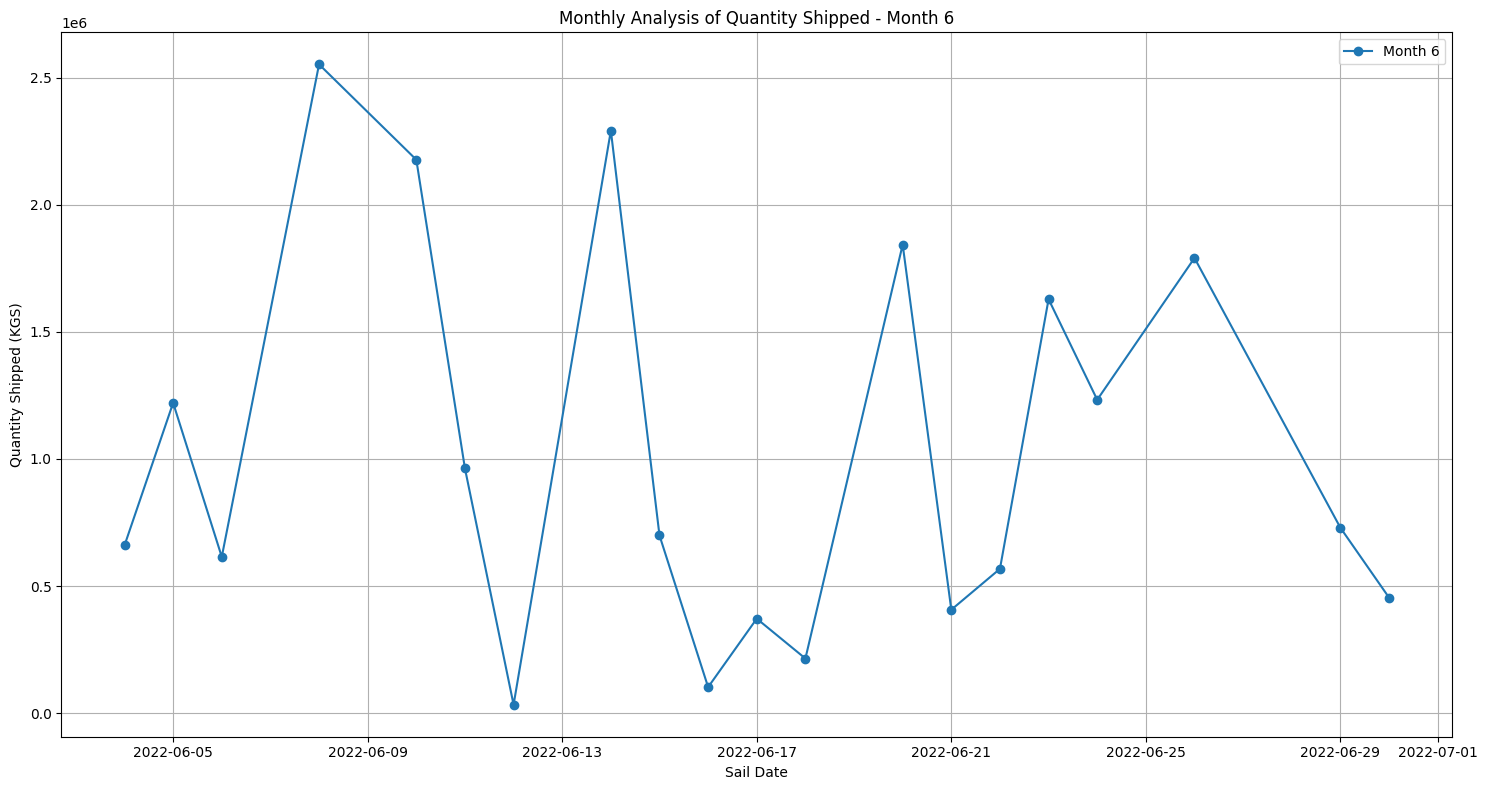

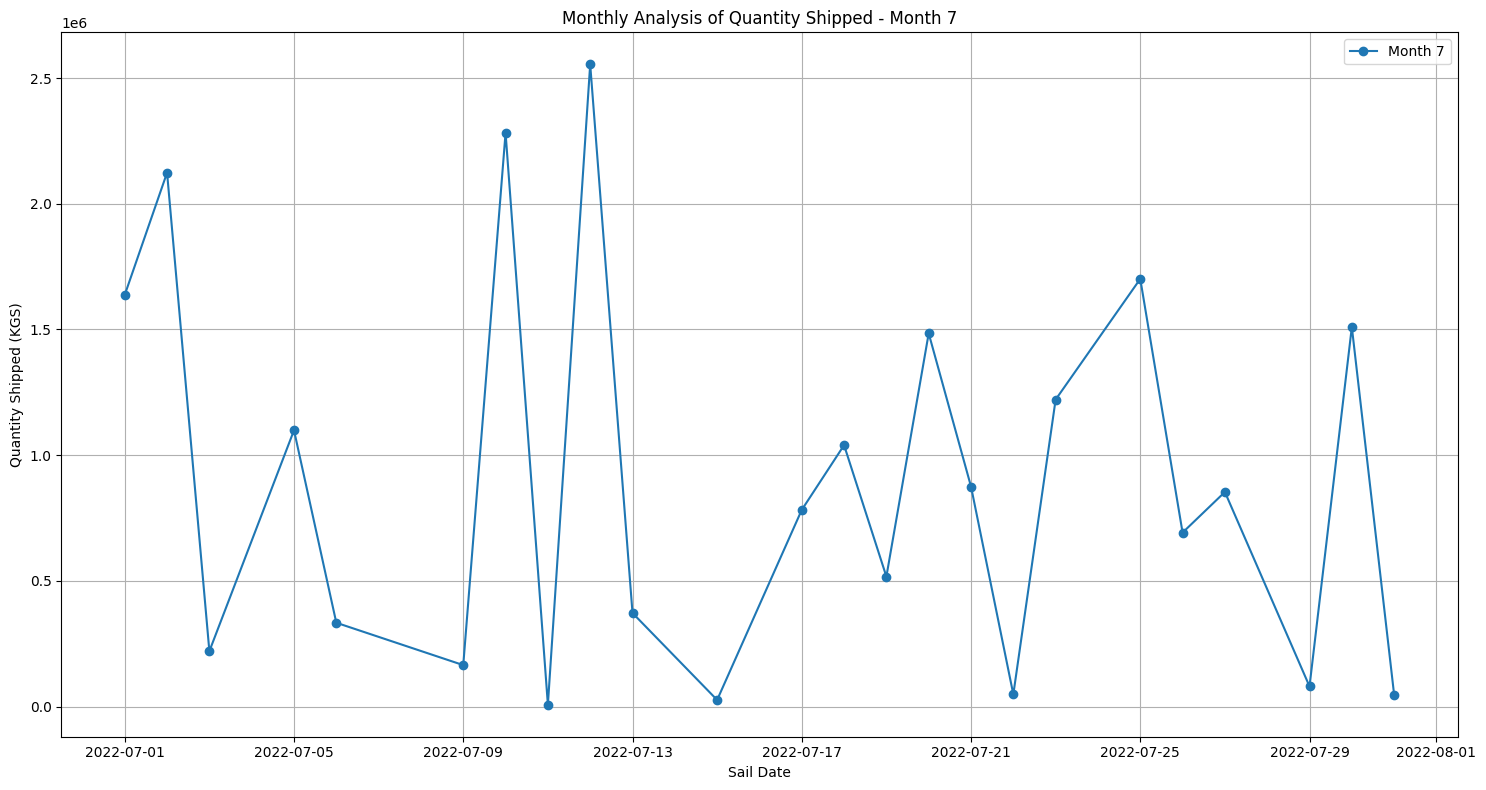

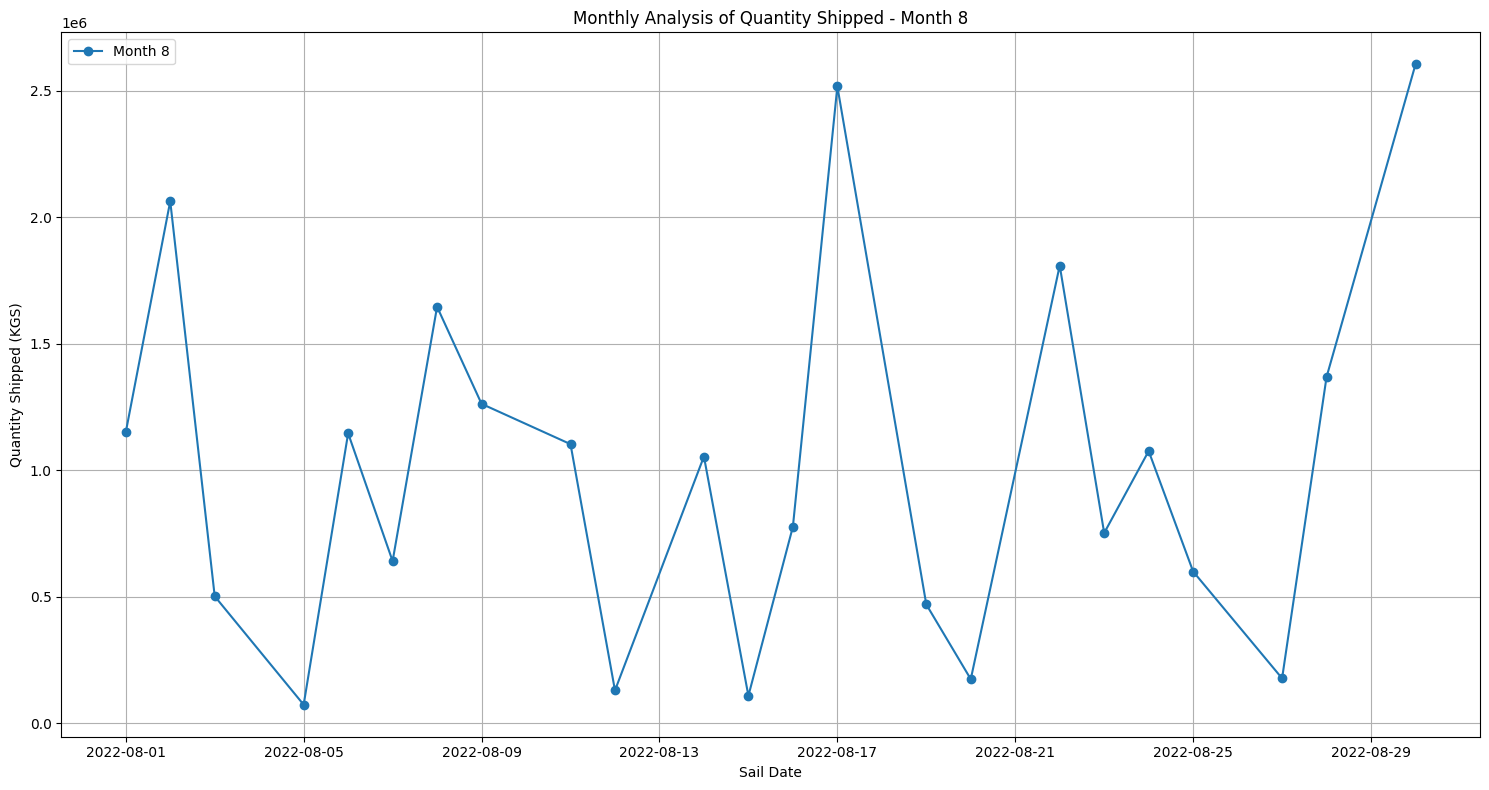

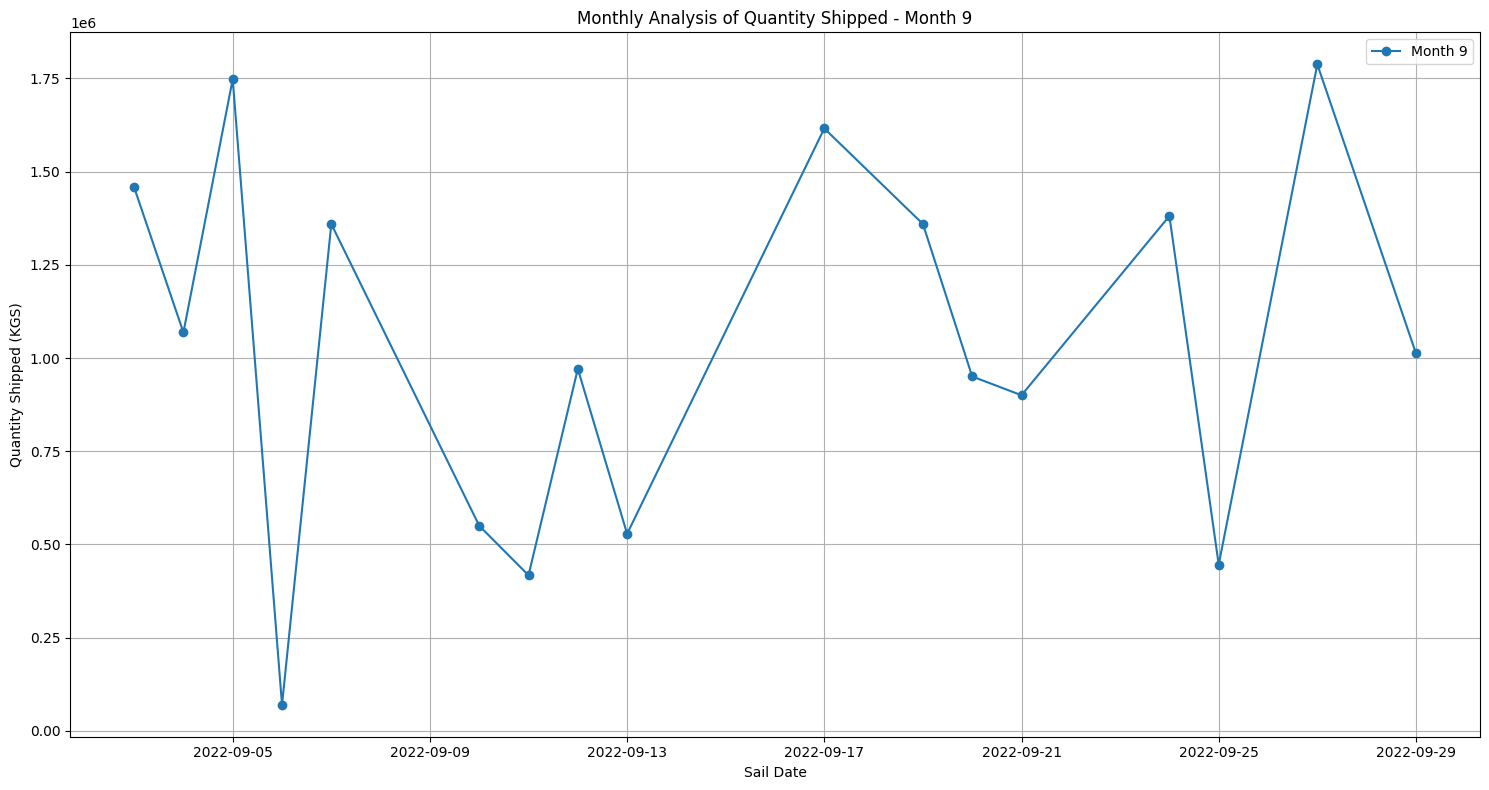

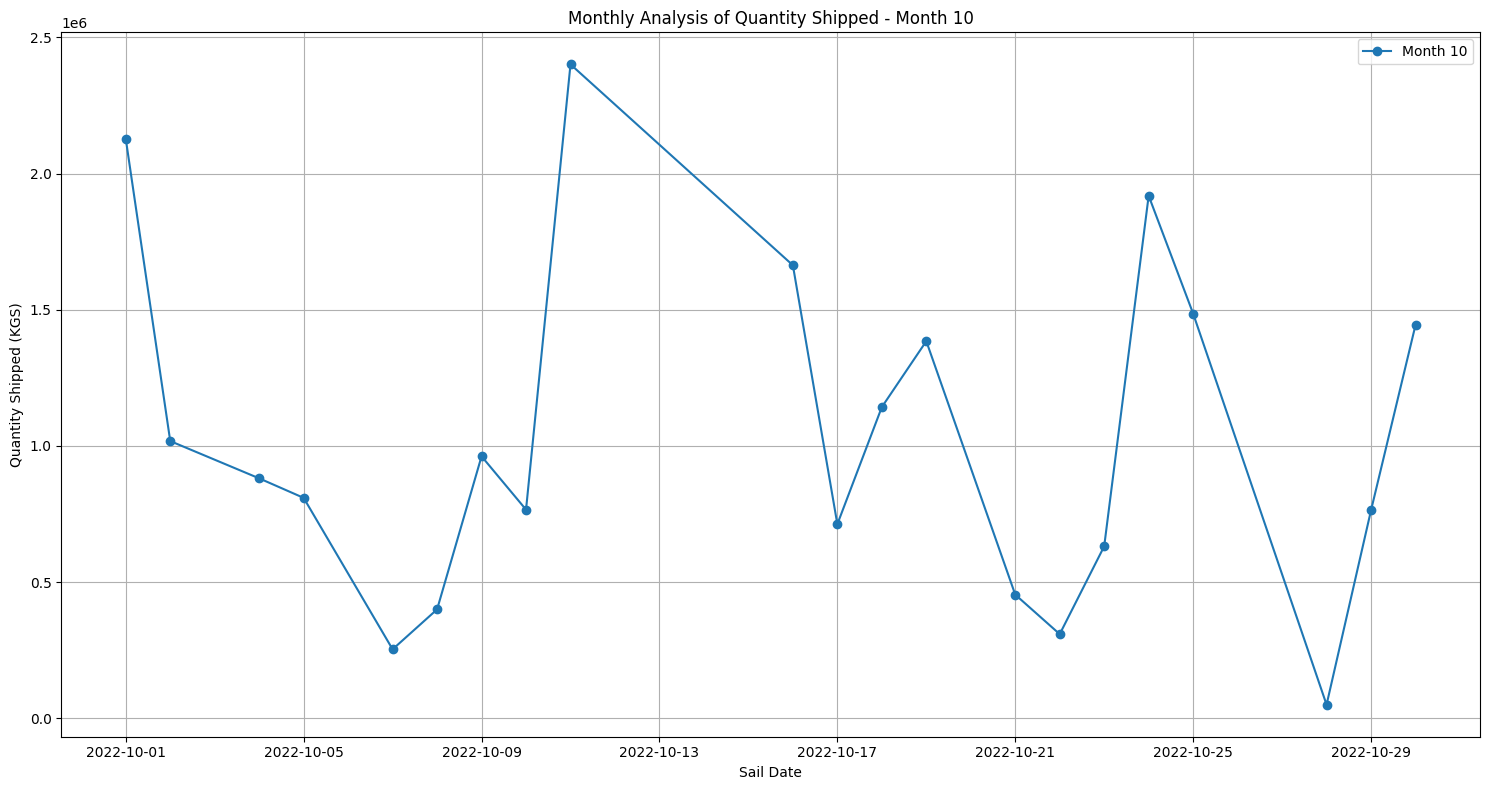

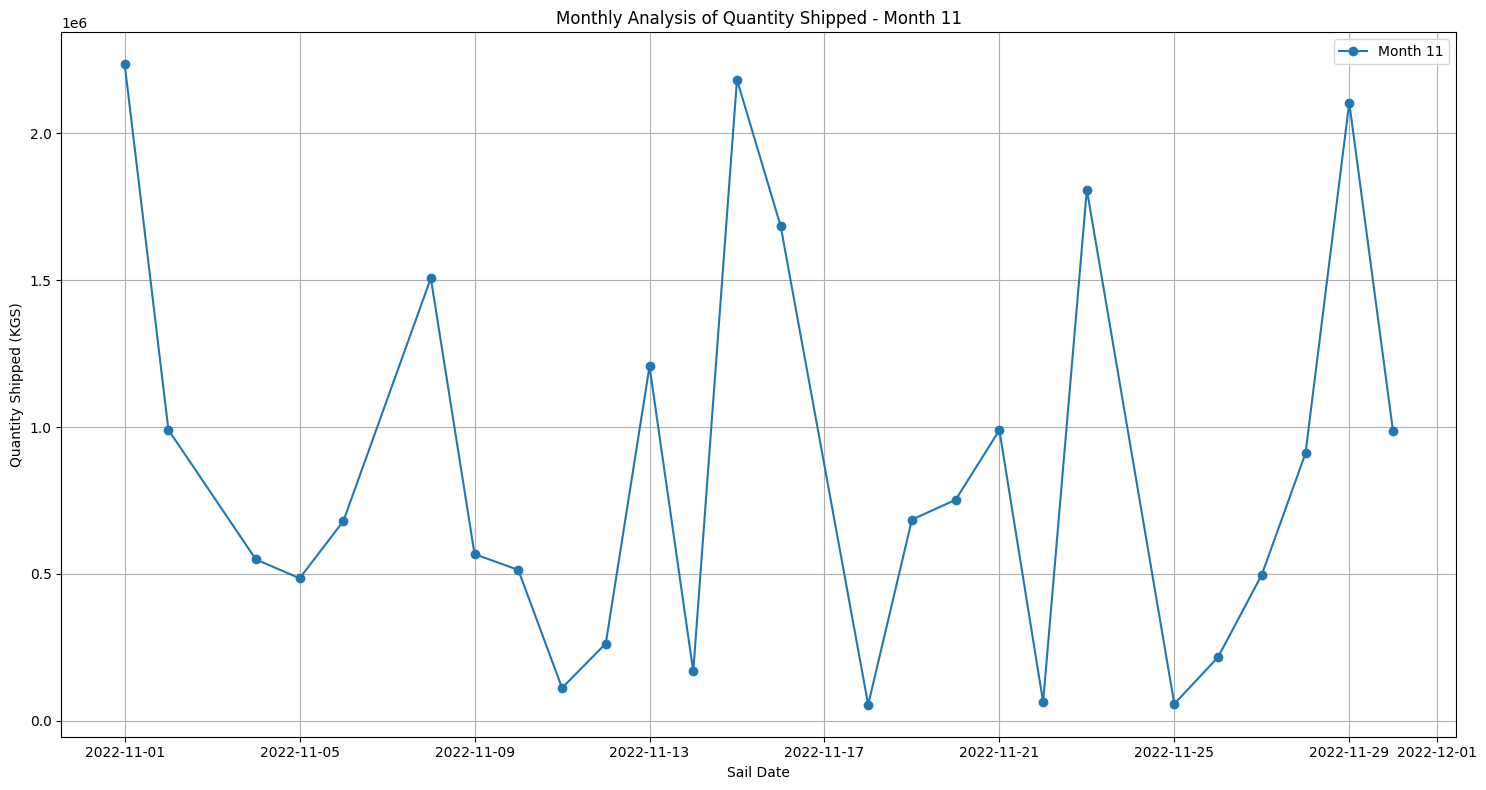

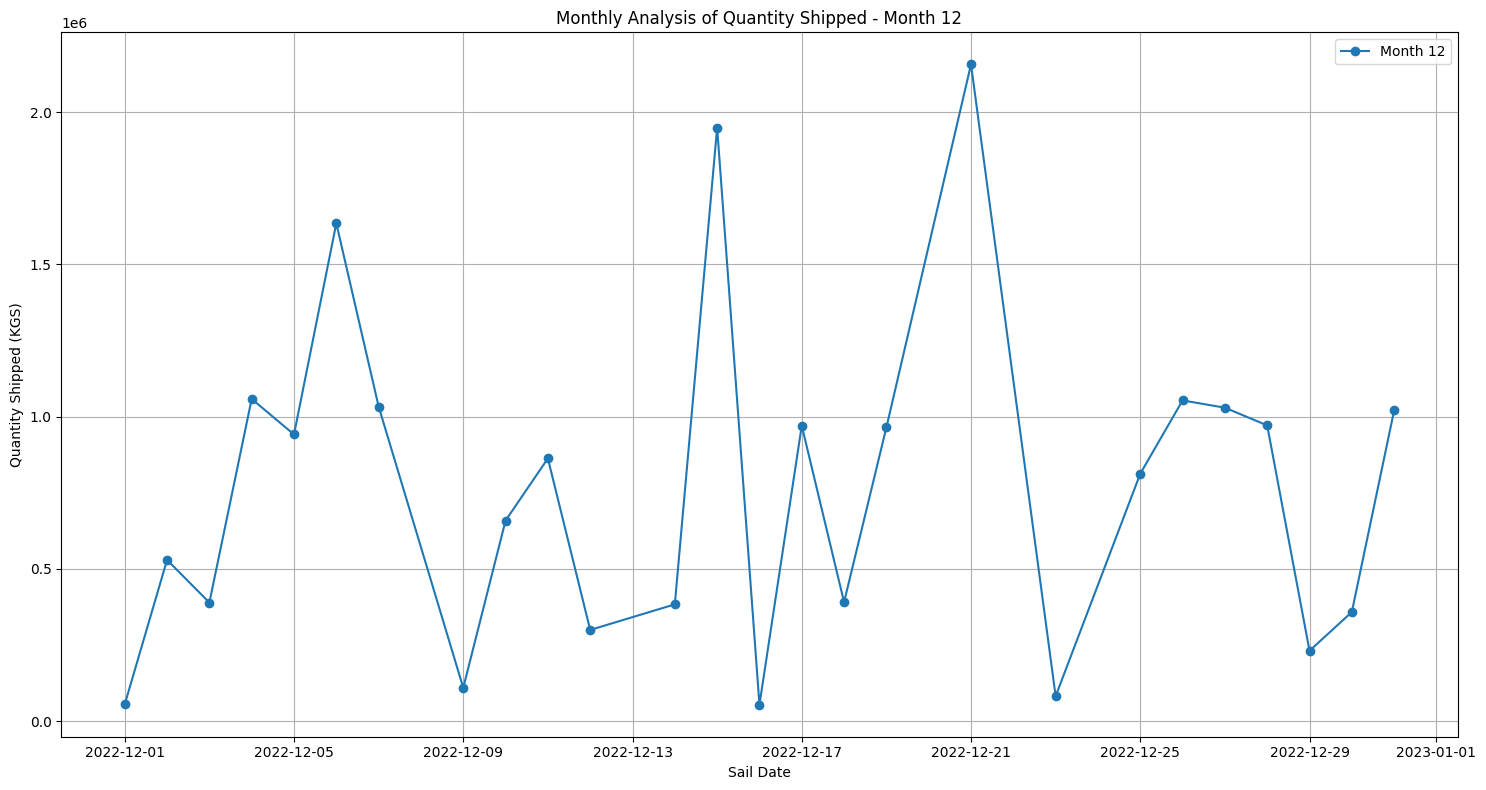

In [23]:
if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
  
    df['Month'] = df['Sail Date.'].dt.month
    for month in range(1, 13):
        
        month_data = df[df['Month'] == month]

        # Plotting
        plt.figure(figsize=(15,8))
        plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')
        plt.xlabel('Sail Date')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")

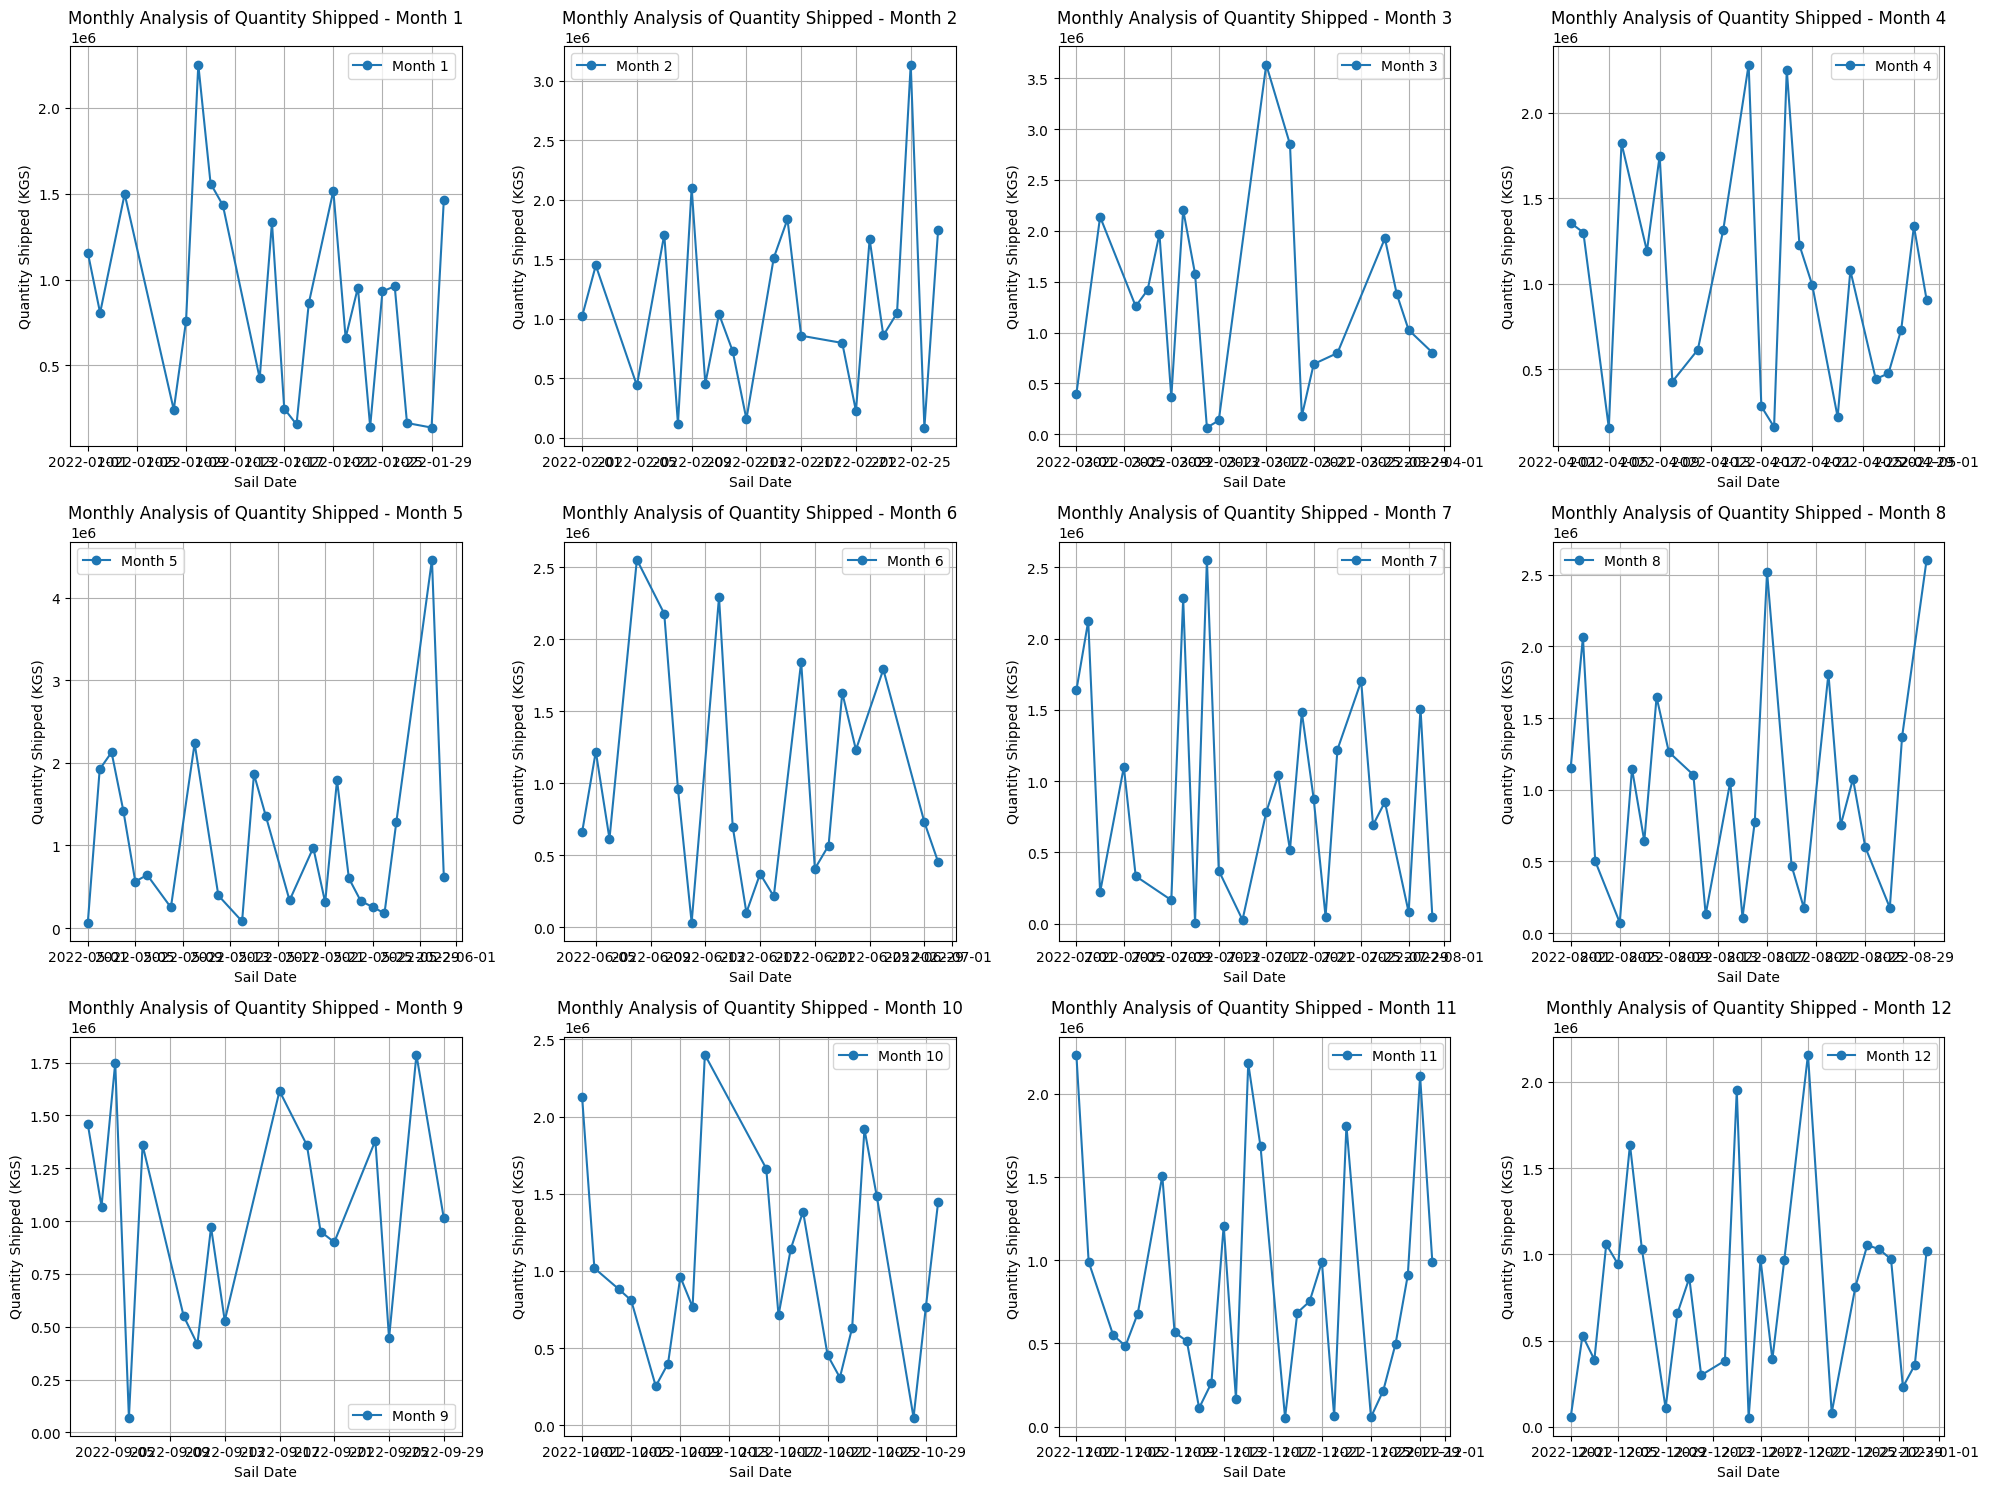

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

if pd.api.types.is_datetime64_any_dtype(df['Sail Date.']):
    df['Month'] = df['Sail Date.'].dt.month

    fig, axes = plt.subplots(3, 4, figsize=(20, 15))

    for month in range(1, 13):
        row = (month - 1) // 4
        col = (month - 1) % 4

        month_data = df[df['Month'] == month]

        axes[row, col].plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')
        axes[row, col].set_xlabel('Sail Date')
        axes[row, col].set_ylabel('Quantity Shipped (KGS)')
        axes[row, col].set_title(f'Monthly Analysis of Quantity Shipped - Month {month}')
        axes[row, col].legend()
        axes[row, col].grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


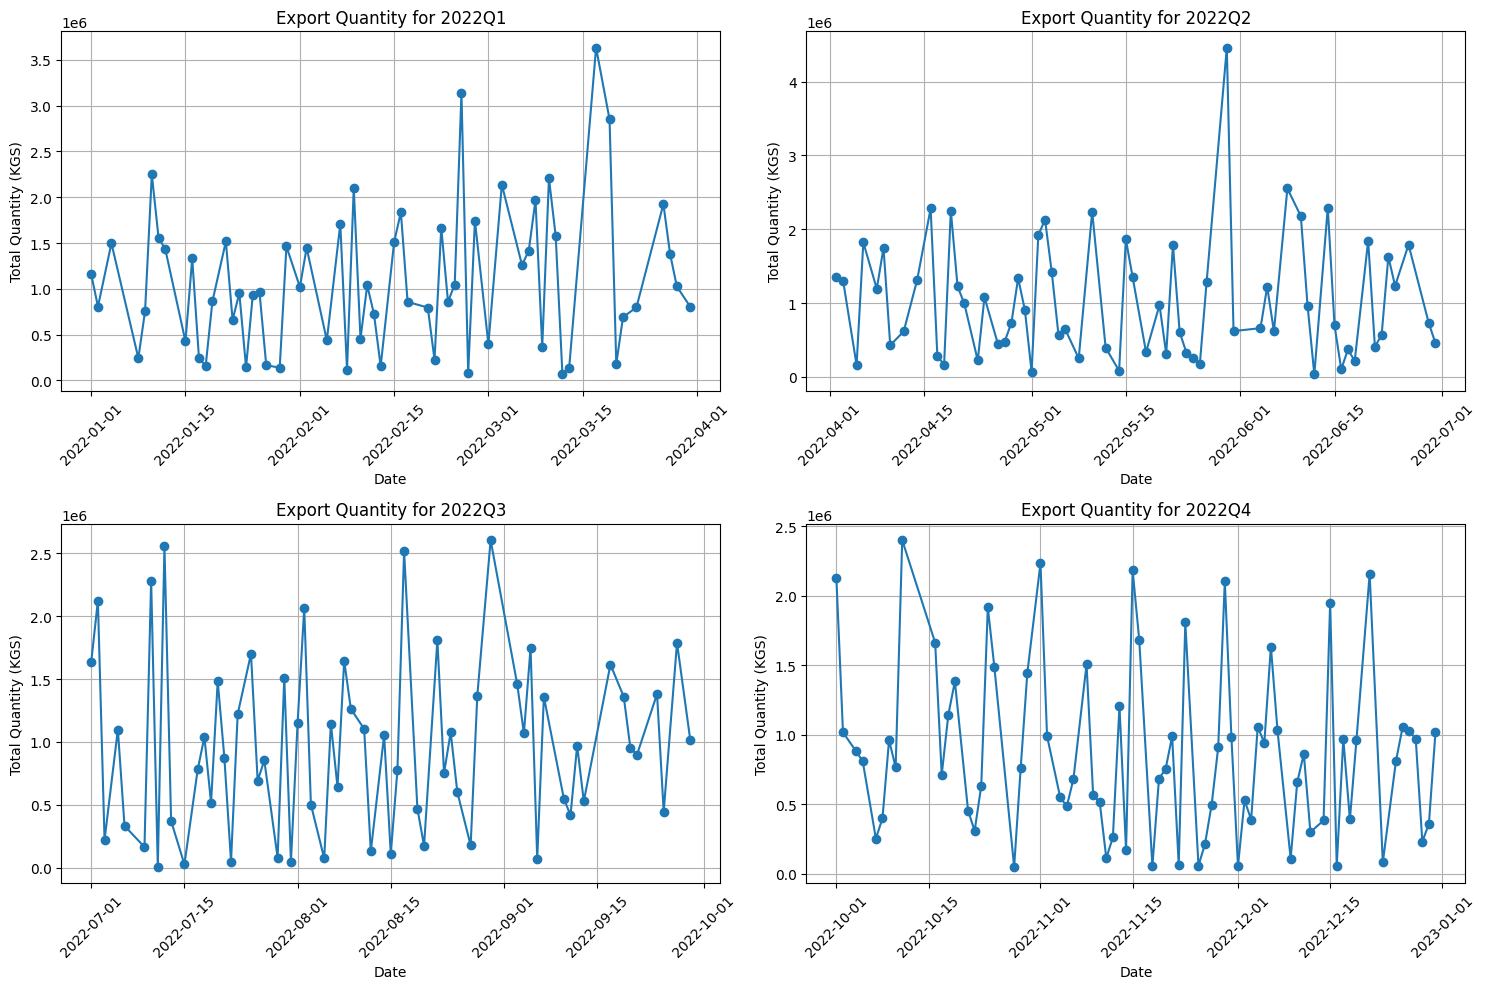

In [25]:
df['Quarter'] = df['Sail Date.'].dt.to_period('Q')

unique_quarters = df['Quarter'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, quarter in enumerate(unique_quarters):
    row = i // 2
    col = i % 2

    quarter_data = df[df['Quarter'] == quarter]

    axes[row, col].plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o')
    axes[row, col].set_title(f'Export Quantity for {quarter}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Total Quantity (KGS)')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()


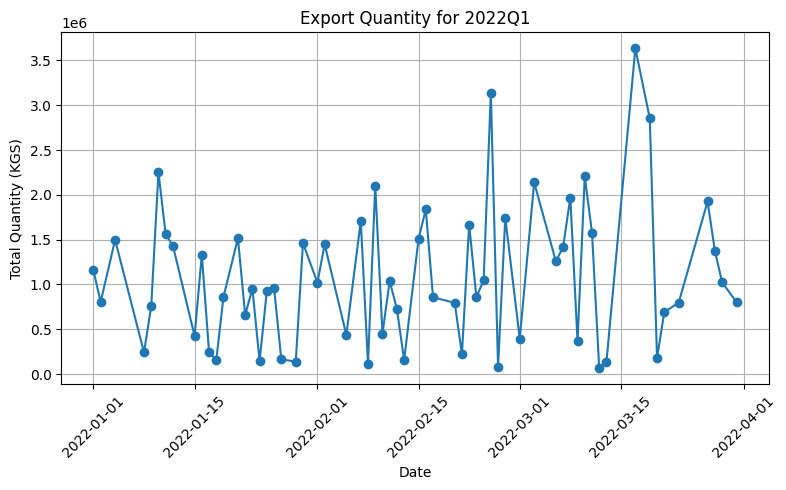

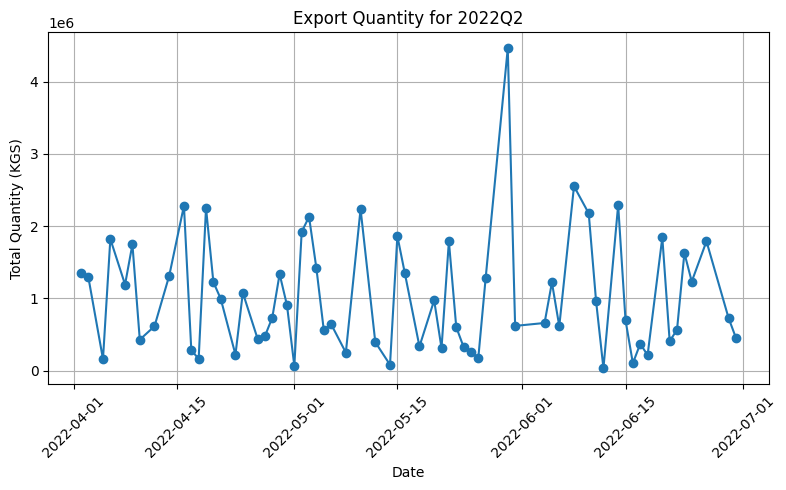

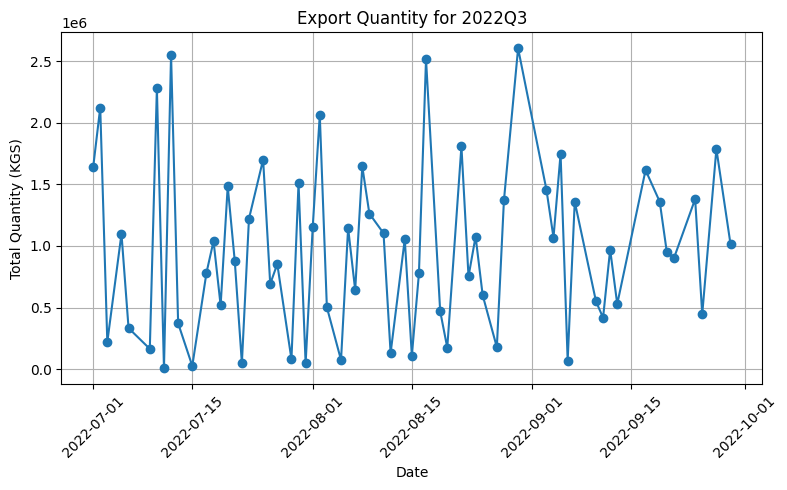

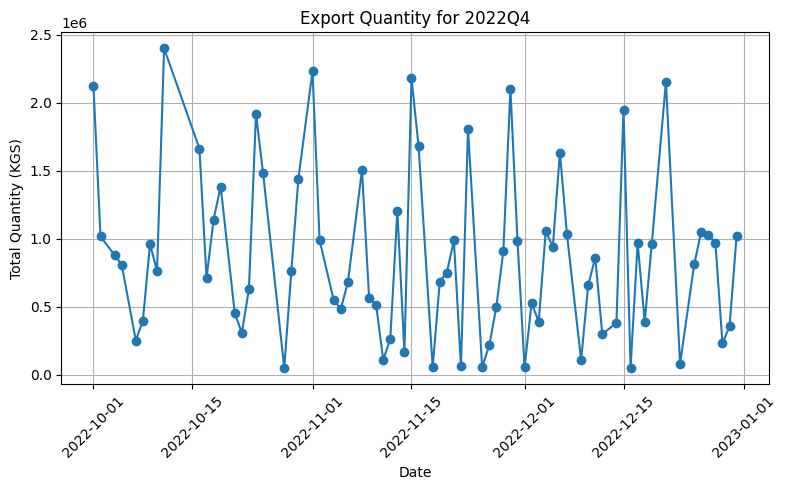

In [26]:
df['Quarter'] = df['Sail Date.'].dt.to_period('Q')

for quarter in df['Quarter'].unique():
    plt.figure(figsize=(8, 5))
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o')
    plt.title(f'Export Quantity for {quarter}')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity (KGS)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

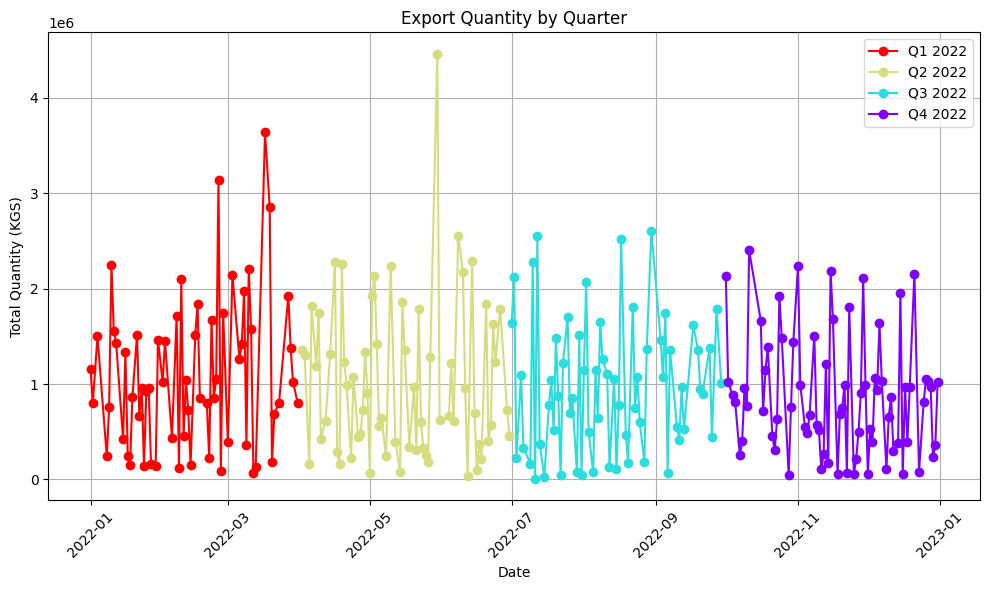

In [27]:
import matplotlib.cm as cm

unique_quarters = df['Quarter'].unique()

colors = cm.rainbow_r(np.linspace(0, 1, len(unique_quarters)))
r
plt.figure(figsize=(10, 6))
for i, quarter in enumerate(unique_quarters):
    quarter_data = df[df['Quarter'] == quarter]
    plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='o', label=f'Q{quarter.quarter} {quarter.year}', color=colors[i])

plt.title('Export Quantity by Quarter')
plt.xlabel('Date')
plt.ylabel('Total Quantity (KGS)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

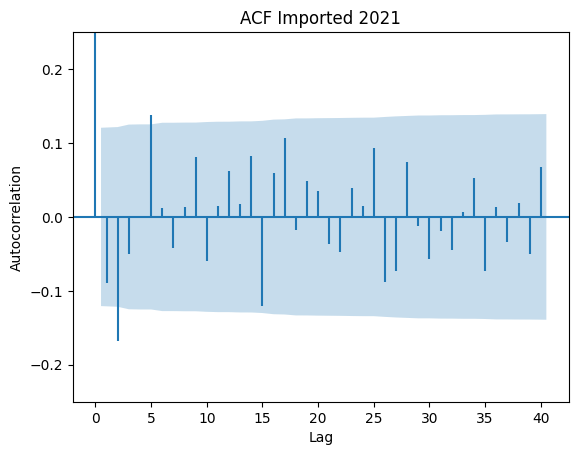

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

sail_date_column = 'Sail Date.'

if sail_date_column in df.columns:
    try:
        df[sail_date_column] = pd.to_datetime(df[sail_date_column])
    except ValueError as e:
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = df.loc[~df[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    if pd.api.types.is_datetime64_any_dtype(df[sail_date_column]):
        df.set_index(sail_date_column, inplace=True)
        
        plt.figure(figsize=(12, 8))

        plot_acf(df['QTY.(KGS)'], lags=40, marker=None)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2021')
        
        plt.ylim(-0.25, 0.25)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")